   # ANALYTICS IN RETAIL WITH PYTHON EDA

In [1]:
#Importing all the EDA libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the datasets and understanding the info

In [4]:
cust= pd.read_csv("Customer.csv")

In [5]:
cust.head()

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [6]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cust_id    5647 non-null   int64  
 1   DOB        5647 non-null   object 
 2   Gender     5645 non-null   object 
 3   city_code  5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [7]:
cust.columns

Index(['cust_id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [8]:
cust.count()

cust_id      5647
DOB          5647
Gender       5645
city_code    5645
dtype: int64

In [9]:
cust.isnull().sum()

cust_id      0
DOB          0
Gender       2
city_code    2
dtype: int64

In [10]:
cust.shape

(5647, 4)

In [11]:
cust.index

RangeIndex(start=0, stop=5647, step=1)

In [12]:
# Dataset II

In [13]:
pcat= pd.read_csv("prod_cat_info.csv")

In [14]:
pcat.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [15]:
pcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [16]:
pcat.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')

In [17]:
pcat.count()

prod_cat_code        23
prod_cat             23
prod_sub_cat_code    23
prod_subcat          23
dtype: int64

In [18]:
pcat.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [19]:
pcat.shape

(23, 4)

In [20]:
pcat.index

RangeIndex(start=0, stop=23, step=1)

In [21]:
# Dataset III

In [22]:
trans= pd.read_csv("Transactions.csv")

In [23]:
trans.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [24]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_sub_cat_code  23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [25]:
trans.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [26]:
trans.count()

transaction_id       23053
cust_id              23053
tran_date            23053
prod_sub_cat_code    23053
prod_cat_code        23053
Qty                  23053
Rate                 23053
Tax                  23053
total_amt            23053
Store_type           23053
dtype: int64

In [27]:
trans.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
dtype: int64

In [28]:
trans.shape

(23053, 10)

In [29]:
trans.index

RangeIndex(start=0, stop=23053, step=1)

# 1. Merge the datasets Customers, Product Hierarchy and Transactions 

In [30]:
# Concatinating the datasets into one dataframe

In [31]:
# Merging the Product_Category_Info with Transactions info into new dataset while considering the product_codes as primary keys


pt= pd.merge(left=trans, right= pcat, on= ["prod_cat_code", "prod_sub_cat_code"], how= "left")

In [32]:
pt.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY


In [33]:
pt.shape

(23053, 12)

In [34]:
pt.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat'],
      dtype='object')

In [35]:
pt.count()

transaction_id       23053
cust_id              23053
tran_date            23053
prod_sub_cat_code    23053
prod_cat_code        23053
Qty                  23053
Rate                 23053
Tax                  23053
total_amt            23053
Store_type           23053
prod_cat             23053
prod_subcat          23053
dtype: int64

In [36]:
pt.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_subcat          0
dtype: int64

In [37]:
# Merging the newly formed dataset with customers info taking customer Id as primary key 
df= pd.merge(left= pt, right=cust, on= ["cust_id"], how="left")

In [38]:
df

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0


In [39]:
df.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [40]:
df.shape

(23053, 15)

# 2. Prepare a summary report for the merged data set.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_sub_cat_code  23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  prod_cat           23053 non-null  object 
 11  prod_subcat        23053 non-null  object 
 12  DOB                23053 non-null  object 
 13  Gender             23044 non-null  object 
 14  city_code          23045 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [42]:
df.head(10)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,27-11-1979,F,3.0


In [43]:
df.tail(10)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,15-01-1982,M,1.0


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_sub_cat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


In [45]:
df.count()

transaction_id       23053
cust_id              23053
tran_date            23053
prod_sub_cat_code    23053
prod_cat_code        23053
Qty                  23053
Rate                 23053
Tax                  23053
total_amt            23053
Store_type           23053
prod_cat             23053
prod_subcat          23053
DOB                  23053
Gender               23044
city_code            23045
dtype: int64

In [46]:
df.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_subcat          0
DOB                  0
Gender               9
city_code            8
dtype: int64

In [47]:
df.describe(include="object")

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23053,23053,23053,23053,23053,23044
unique,1129,4,6,18,3987,2
top,13-07-2011,e-Shop,Books,Women,27-12-1988,M
freq,35,9311,6069,3048,32,11811


# Manipulating and filtering the data

In [48]:
# Changing the DOB and Transaction dates to date formats

In [49]:
df["DOB"]=pd.to_datetime(df["DOB"],format="%d-%m-%Y")

In [50]:
df["tran_date"]=pd.to_datetime(df["tran_date"],format="%d-%m-%Y")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  datetime64[ns]
 3   prod_sub_cat_code  23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  prod_cat           23053 non-null  object        
 11  prod_subcat        23053 non-null  object        
 12  DOB                23053 non-null  datetime64[ns]
 13  Gender             23044 non-null  object        
 14  city_c

In [52]:
# Checking for duplicates

In [53]:
df.duplicated().sum()

13

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23040 non-null  int64         
 1   cust_id            23040 non-null  int64         
 2   tran_date          23040 non-null  datetime64[ns]
 3   prod_sub_cat_code  23040 non-null  int64         
 4   prod_cat_code      23040 non-null  int64         
 5   Qty                23040 non-null  int64         
 6   Rate               23040 non-null  int64         
 7   Tax                23040 non-null  float64       
 8   total_amt          23040 non-null  float64       
 9   Store_type         23040 non-null  object        
 10  prod_cat           23040 non-null  object        
 11  prod_subcat        23040 non-null  object        
 12  DOB                23040 non-null  datetime64[ns]
 13  Gender             23031 non-null  object        
 14  city_c

# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [56]:
df.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'DOB', 'Gender', 'city_code'],
      dtype='object')

 Histograms for all continuous variables 

In [57]:
df.prod_cat_code.value_counts()

5    6066
3    4895
6    4126
2    2996
1    2960
4    1997
Name: prod_cat_code, dtype: int64

<AxesSubplot:title={'center':'Product Category Code'}, ylabel='Frequency'>

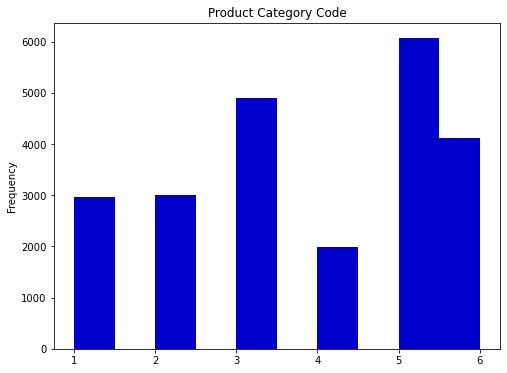

In [58]:
df.prod_cat_code.plot(kind="hist",title="Product Category Code", color="mediumblue",figsize=(8,6))

In [59]:
df.prod_sub_cat_code.value_counts()

4     4000
3     3065
10    2991
1     2948
11    2057
12    2027
7     1043
2     1007
6      989
9      985
8      970
5      958
Name: prod_sub_cat_code, dtype: int64

<AxesSubplot:title={'center':'Product Sub Category Code'}, ylabel='Frequency'>

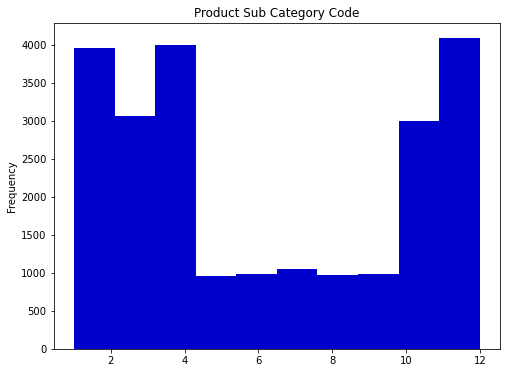

In [60]:
df.prod_sub_cat_code.plot(kind="hist",title="Product Sub Category Code", color="mediumblue",figsize=(8,6))

In [61]:
df.Qty.value_counts()

 5    4259
 1    4214
 3    4174
 2    4123
 4    4106
-4     455
-5     452
-2     436
-1     417
-3     404
Name: Qty, dtype: int64

<AxesSubplot:title={'center':'Qty'}, ylabel='Frequency'>

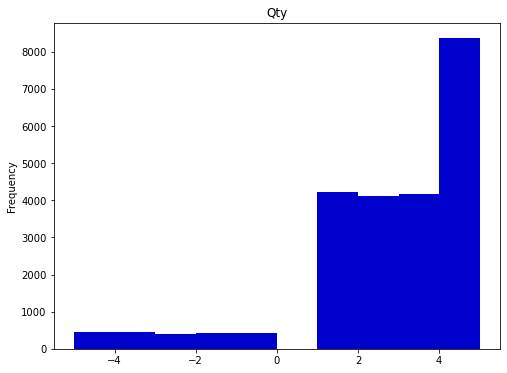

In [62]:
df.Qty.plot(kind="hist",title="Qty", color="mediumblue",figsize=(8,6))

In [63]:
df.Rate.value_counts()

 552    29
 672    29
 472    28
 618    27
 922    27
        ..
-519     1
-172     1
-585     1
-407     1
-203     1
Name: Rate, Length: 2551, dtype: int64

<AxesSubplot:title={'center':'Rate'}, ylabel='Frequency'>

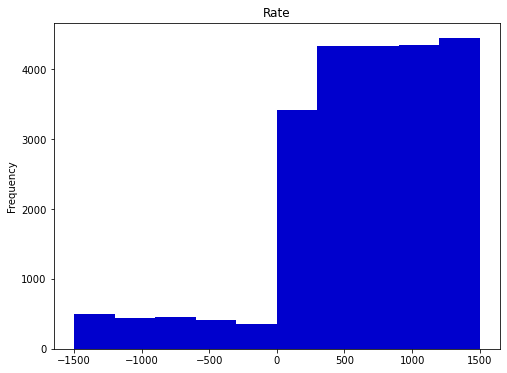

In [64]:
df.Rate.plot(kind="hist",title="Rate", color="mediumblue",figsize=(8,6))

In [65]:
df.Tax.value_counts()

64.260     26
69.300     25
129.150    25
151.200    23
81.900     23
           ..
415.485     1
13.650      1
410.445     1
601.440     1
139.335     1
Name: Tax, Length: 4194, dtype: int64

<AxesSubplot:title={'center':'Tax Amount'}, ylabel='Frequency'>

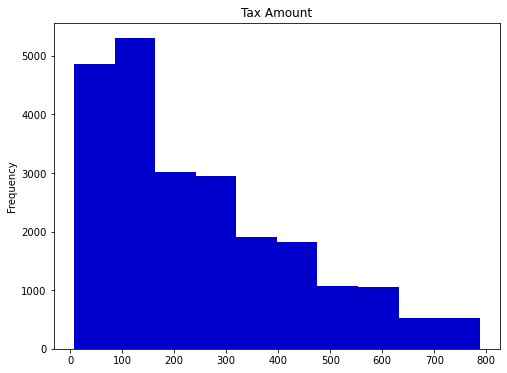

In [66]:
df.Tax.plot(kind="hist",title="Tax Amount", color="mediumblue",figsize=(8,6))

In [67]:
df.total_amt.value_counts()

 676.260     22
 729.300     22
 3049.800    22
 1591.200    21
 1021.020    21
             ..
-7635.550     1
-3416.660     1
 5829.980     1
-470.730      1
 1466.335     1
Name: total_amt, Length: 5764, dtype: int64

<AxesSubplot:title={'center':'Total Amount'}, ylabel='Frequency'>

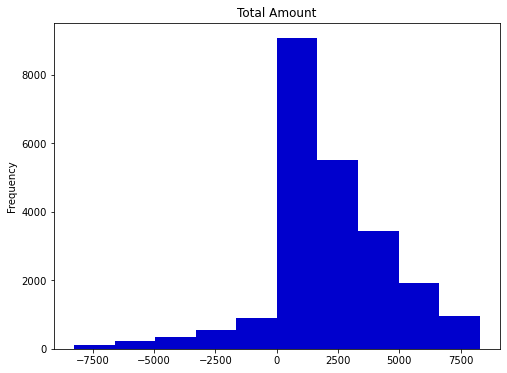

In [68]:
df.total_amt.plot(kind="hist",title="Total Amount", color="mediumblue",figsize=(8,6))

# Bar charts for categorical variables

In [69]:
df.loc[:,df.dtypes=="object"].head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


In [70]:
df.Store_type.value_counts()

e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64

C:\Users\91903\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


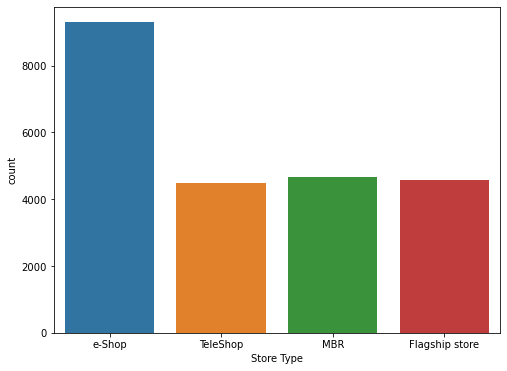

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(df['Store_type'])
plt.xlabel('Store Type')
plt.show()

In [72]:
df.prod_cat.value_counts()

Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64

C:\Users\91903\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


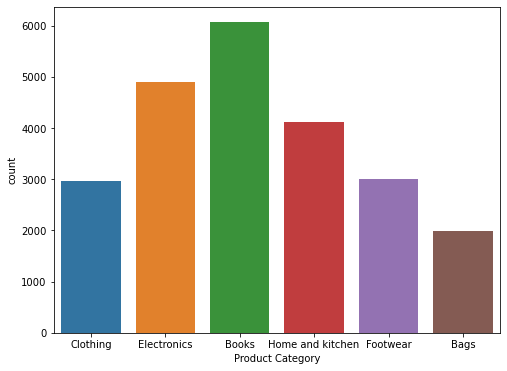

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(df['prod_cat'])
plt.xlabel('Product Category')
plt.show()

In [74]:
df.prod_subcat.value_counts()

Women                  3046
Mens                   2910
Kids                   1997
Tools                  1061
Fiction                1043
Kitchen                1036
Children               1035
Mobiles                1030
Comics                 1030
Bath                   1022
Furnishing             1007
Non-Fiction            1003
DIY                     989
Cameras                 985
Personal Appliances     970
Academic                966
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

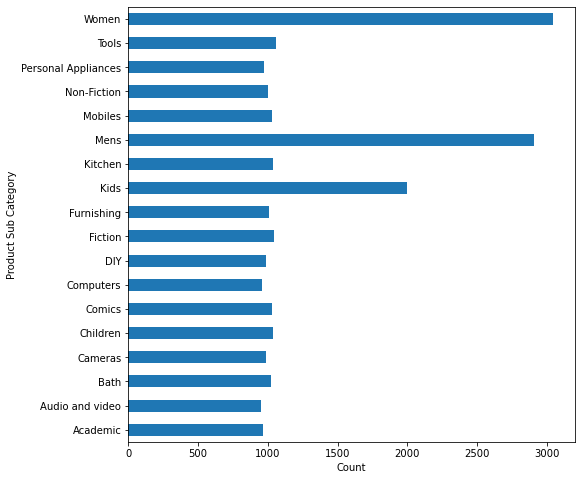

In [75]:
plt.figure(figsize=(8,8))
df.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.ylabel('Product Sub Category')
plt.xlabel("Count")
plt.show()

In [76]:
df.Gender.value_counts()

M    11804
F    11227
Name: Gender, dtype: int64

C:\Users\91903\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


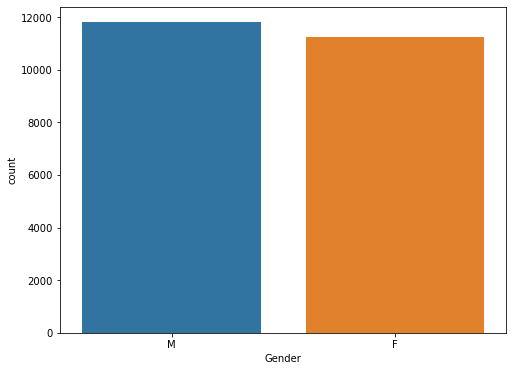

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.show()

# 4. Calculate the following information using the merged dataset :


# a. Time period of the available transaction data

In [78]:
df.sort_values(by="tran_date").head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,1982-01-15,M,1.0
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,Kids,1989-04-14,F,6.0
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,1989-09-23,M,4.0
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,1992-11-24,M,9.0
23036,46821751538,269160,2011-01-25,10,5,5,941,494.025,5199.025,TeleShop,Books,Non-Fiction,1972-01-24,F,1.0


In [79]:
start_date=df.tran_date.min()

In [80]:
end_date=df.tran_date.max()

In [81]:
print("Time period of the available transaction data is from ",start_date,end_date)

Time period of the available transaction data is from  2011-01-25 00:00:00 2014-02-28 00:00:00


# b. Count of transactions where the total amount of transaction was negative

In [82]:
df.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0


In [83]:
negative_trans= df.loc[df["total_amt"]<0,"transaction_id"].count()
negative_trans

2164

In [84]:
# Percentage of negative transactions among total transactions 
perc_negative_trans=negative_trans/df.transaction_id.sum()*100
perc_negative_trans

1.8758628137913403e-10

In [85]:
print("The total number of negative transactions are:",negative_trans )

The total number of negative transactions are: 2164


# 5. Analyze which product categories are more popular among female vs male customers.

In [86]:
Pcat= df.groupby(["Gender","prod_cat"])[["Qty"]].sum()

In [87]:
Pcat

Qty
Gender prod_cat              
F      Bags              2364
       Books             7080
       Clothing          3425
       Electronics       5832
       Footwear          3721
       Home and kitchen  4898
M      Bags              2346
       Books             7587
       Clothing          3748
       Electronics       6486
       Footwear          3561
       Home and kitchen  5051

<AxesSubplot:title={'center':'Produt Categories across Genders'}, xlabel='Product Category', ylabel='Qty'>

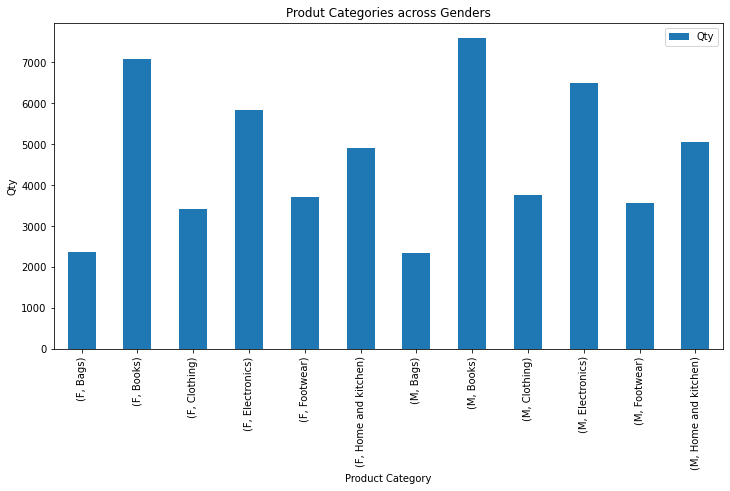

In [88]:
Pcat.plot(kind="bar",figsize=(12,6), xlabel=("Product Category"),ylabel= ("Qty"), legend= True, title= "Produt Categories across Genders")

# 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [89]:
df.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0


In [90]:
cust_city = df.groupby('city_code')['cust_id'].count().sort_values(ascending =False)
cust_city

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: cust_id, dtype: int64

<AxesSubplot:title={'center':'Customer base across cities'}, xlabel='City Code', ylabel='No. of Customers'>

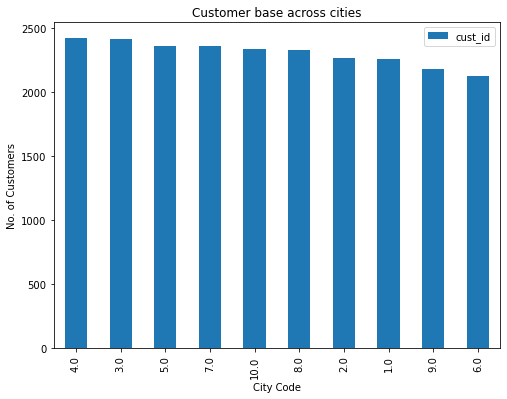

In [91]:
cust_city.plot(kind="bar", figsize=(8,6), xlabel=("City Code"),ylabel= ("No. of Customers"), legend= True, title= "Customer base across cities")

In [92]:
city_share = (cust_city[4.0]/cust_city.sum())*100

In [93]:
city_share=round(city_share,2)
city_share

10.52

In [94]:
print("The maximum customers are from city_code {} and its percentage from overall cities is {}%".format(4.0,city_share))

The maximum customers are from city_code 4.0 and its percentage from overall cities is 10.52%


# 7. Which store type sells the maximum products by value and by quantity?

In [95]:
df.head(1)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,1981-09-26,M,5.0


In [96]:
store_type_max =df.groupby("Store_type")[["Qty","Rate"]].sum().sort_values(by="Qty" ,ascending= False)

In [97]:
store_type_max.T

Store_type,e-Shop,MBR,Flagship store,TeleShop
Qty,22790,11195,11142,10993
Rate,5945770,2953665,2942874,2836359


array([<AxesSubplot:ylabel='Qty'>, <AxesSubplot:ylabel='Rate'>],
      dtype=object)

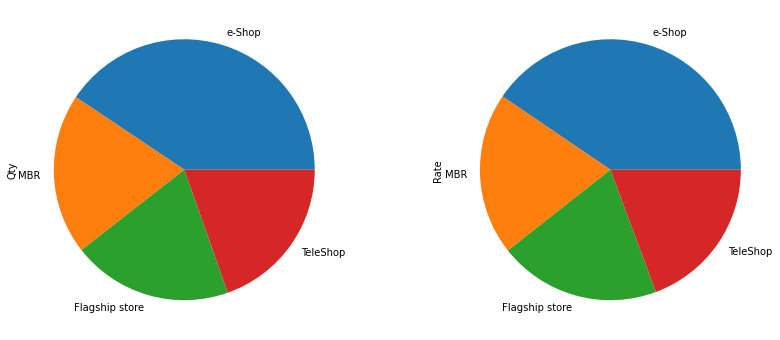

In [98]:
store_type_max.plot(kind="pie", subplots=True, figsize=(14,6),legend= False)

# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [99]:
df.head(1)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,1981-09-26,M,5.0


In [100]:
df.Store_type.value_counts()

e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64

In [101]:
df.prod_cat.value_counts()

Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64

In [102]:
cat_group=df.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum')
cat_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1617933.265
Books,2493677.810,2496039.195,2545714.470,5297161.155
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107969.825,1978457.195,4429142.770
Footwear,1234806.560,1112163.715,1235719.290,2643215.250
Home and kitchen,1713004.150,1822403.570,1581227.375,3327977.120


<AxesSubplot:title={'center':'Sales Amount across categories and Store types'}, xlabel='Product Category', ylabel='Total Amount'>

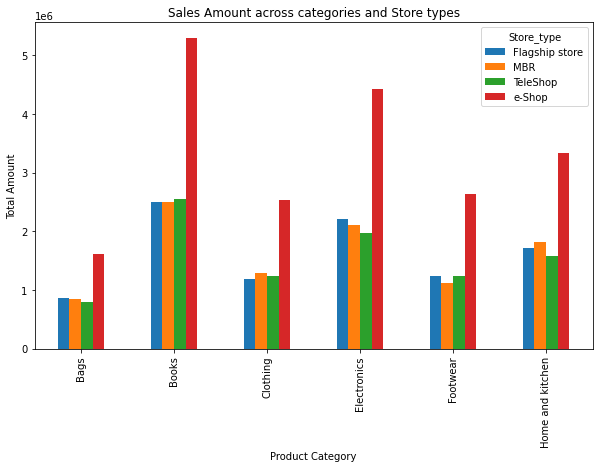

In [103]:
cat_group.plot(kind="bar",figsize=(10,6), xlabel=("Product Category"),ylabel= ("Total Amount"), legend= True, title= "Sales Amount across categories and Store types")

In [104]:
cat_group_amount=cat_group.loc[["Clothing","Electronics"],"Flagship store"].sum()
cat_group_amount

3409559.27

# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [105]:
gender_group= df.pivot_table(index="prod_cat", columns="Gender", values="total_amt",aggfunc="sum")
gender_group

Gender,F,M
prod_cat,,
Bags,2079618.840,2046722.990
Books,6174590.825,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5711351.620
Footwear,3203155.215,3020200.365
Home and kitchen,4133702.235,4305169.505


<AxesSubplot:title={'center':'Sales Amount across categories and Gender'}, xlabel='Product Category', ylabel='Total Amount'>

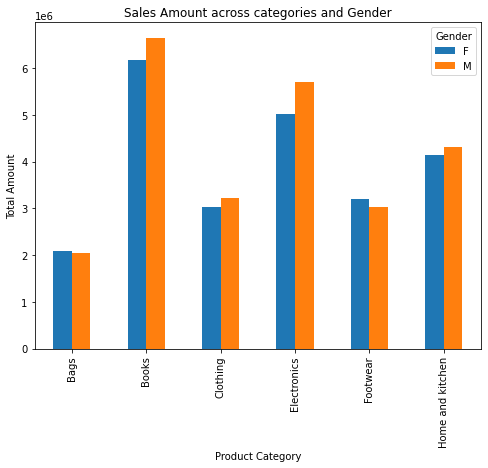

In [106]:
gender_group.plot(kind="bar",figsize=(8,6), xlabel=("Product Category"),ylabel= ("Total Amount"), legend= True, title= "Sales Amount across categories and Gender")

In [107]:
male_amount=gender_group.loc["Electronics","M"]
male_amount

5711351.62

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [108]:
# Finding out all the available positive transactions

In [109]:
pos_trans = df.loc[df["total_amt"]>0,:]
pos_trans

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0


In [110]:
#Finding out all the unique transactions across all the customers

In [111]:
unique_trans = pos_trans.groupby(['cust_id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_trans

,cust_id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [112]:
# #Counting all the unique transactions among all the customers

In [113]:
unique_trans_count = unique_trans.groupby('cust_id')['transaction_id'].count().reset_index()
unique_trans_count

,cust_id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [114]:
#Checking if there exists any customer with more than 10 unique transactions 

In [115]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,cust_id,transaction_id


In [116]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


# 11. For all customers aged between 25 - 35, find out:

# a. What was the total amount spent for “Electronics” and “Books” product categories?

In [117]:
#Adding new column "age"

In [118]:
now = pd.Timestamp('now')
df['DOB'] = pd.to_datetime(df['DOB'], format='%m%d%y')   
df['DOB'] = df['DOB'].where(df['DOB'] < now, df['DOB'] -  np.timedelta64(100, 'Y'))
df['AGE'] = (now - df['DOB']).astype('<m8[Y]')

In [119]:
df.head(2)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,40.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0,49.0


as we have to deal with customers aged between 25-35, so creating new column 'Age_cat'

In [120]:
df['Age_cat'] = pd.cut(df['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [121]:
df.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,40.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0,49.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0,41.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35


In [122]:
customer_25_35 = df.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
customer_25_35

Age_cat  prod_cat        
25-35    Bags                1122020.315
         Books               3381021.540
         Clothing            1939255.110
         Electronics         3093856.350
         Footwear            1868087.585
         Home and kitchen    2433523.820
36-46    Bags                1937870.545
         Books               6353944.480
         Clothing            2914828.670
         Electronics         5016634.805
         Footwear            2893729.800
         Home and kitchen    4084811.510
47-57    Bags                1066450.970
         Books               3097626.610
         Clothing            1397053.710
         Electronics         2620214.675
         Footwear            1464087.430
         Home and kitchen    1926276.885
Name: total_amt, dtype: float64

<AxesSubplot:title={'center':'Sales Amount across Age categories'}, xlabel='Age_cat vs prod_cat', ylabel='Total Amount'>

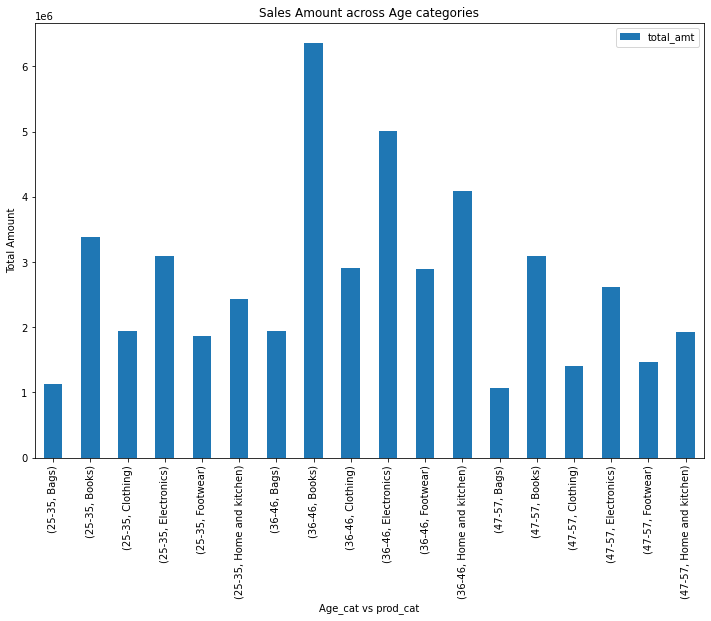

In [123]:
customer_25_35.plot(kind="bar",figsize=(12,8), xlabel=("Age_cat vs prod_cat"),ylabel= ("Total Amount"), legend= True, title= "Sales Amount across Age categories")

In [124]:
a=customer_25_35.loc['25-35',['Books','Electronics']]
a

Age_cat  prod_cat   
25-35    Books          3381021.54
         Electronics    3093856.35
Name: total_amt, dtype: float64

<AxesSubplot:title={'center':'Total Amount for Books and Electronics'}, xlabel='Age_cat vs prod_cat', ylabel='Total Amount'>

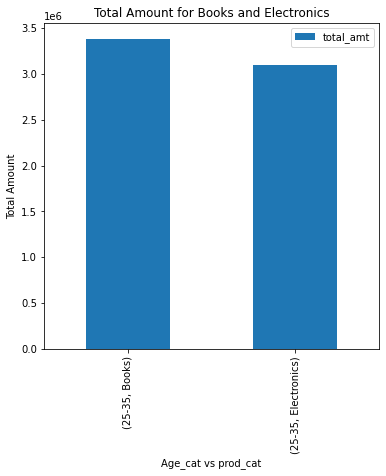

In [125]:
a.plot(kind="bar",figsize=(6,6), xlabel=("Age_cat vs prod_cat"),ylabel= ("Total Amount"), legend= True, title= "Total Amount for Books and Electronics")

In [126]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 6474877.89


# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [127]:
df.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,40.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0,49.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0,41.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35


In [128]:
customer_total_amount_25_35 = df[df['Age_cat']=='25-35']

In [129]:
customer_total_amount_25_35.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.40,4508.40,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0,35.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,1989-08-17,M,10.0,32.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,1992-01-02,F,6.0,30.0,25-35


In [130]:
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

In [131]:
total_amount

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0,35.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,1989-08-17,M,10.0,32.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,1992-01-02,F,6.0,30.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,14460826915,269348,2014-01-01,11,6,3,84,26.460,278.460,MBR,Home and kitchen,Bath,1989-02-10,M,9.0,33.0,25-35
1051,32889219128,269536,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,1990-03-21,M,5.0,32.0,25-35
1054,42711619809,271701,2014-01-01,1,2,5,336,176.400,1856.400,MBR,Footwear,Mens,1991-07-11,M,7.0,31.0,25-35
1059,67088172893,271877,2014-01-01,1,1,1,902,94.710,996.710,e-Shop,Clothing,Women,1992-03-28,F,6.0,30.0,25-35


In [132]:
(total_amount['total_amt'].sum())

675570.48

# Insights

In [133]:
#Top 5 customers by No.of transactions
top_5_cust=df.cust_id.value_counts().head(5)
top_5_cust

268819    13
269449    13
275252    12
272415    12
270831    12
Name: cust_id, dtype: int64

<AxesSubplot:title={'center':'Top 5 customers by No of transactions'}, xlabel='Customer Id', ylabel='No. of transactions'>

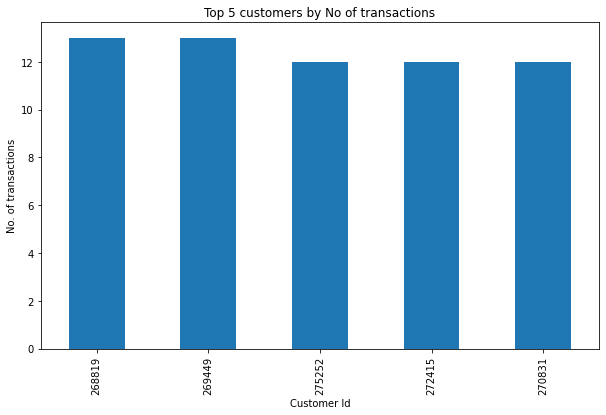

In [134]:
df.cust_id.value_counts().head(5).plot(kind="bar",figsize=(10,6), xlabel=("Customer Id"),ylabel= ("No. of transactions"), title= "Top 5 customers by No of transactions")

In [135]:
df.total_amt.describe()

count    23040.000000
mean      2109.865226
std       2505.610295
min      -8270.925000
25%        762.450000
50%       1756.950000
75%       3570.255000
max       8287.500000
Name: total_amt, dtype: float64

In [136]:
df[df.total_amt== df.total_amt.max()]

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE,Age_cat
6864,94956713072,271944,2013-03-23,4,2,5,1500,787.5,8287.5,e-Shop,Footwear,Kids,1971-12-11,F,5.0,50.0,47-57
11292,47747209902,270667,2012-08-23,5,3,5,1500,787.5,8287.5,MBR,Electronics,Computers,1974-02-24,M,9.0,48.0,47-57
13009,53187031441,272954,2012-05-26,2,6,5,1500,787.5,8287.5,TeleShop,Home and kitchen,Furnishing,1980-06-05,F,3.0,42.0,36-46
20123,96892547017,274854,2011-06-21,3,2,5,1500,787.5,8287.5,e-Shop,Footwear,Women,1978-02-07,M,1.0,44.0,36-46


In [137]:
df.total_amt.sum()

48611294.81

In [138]:
df.tran_date.describe()

C:\Users\91903\AppData\Local\Temp/ipykernel_1824/3860377318.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.tran_date.describe()


count                   23040
unique                   1129
top       2011-07-13 00:00:00
freq                       35
first     2011-01-25 00:00:00
last      2014-02-28 00:00:00
Name: tran_date, dtype: object

In [139]:
df.tran_date.value_counts().head(1)

2011-07-13    35
Name: tran_date, dtype: int64

In [140]:
df.prod_sub_cat_code.value_counts().head(1)

4    4000
Name: prod_sub_cat_code, dtype: int64

In [141]:
df.prod_cat_code.value_counts().head(1)

5    6066
Name: prod_cat_code, dtype: int64

In [142]:
df.Store_type.value_counts().head(1)

e-Shop    9304
Name: Store_type, dtype: int64

In [143]:
df.prod_cat.value_counts().head(1)

Books    6066
Name: prod_cat, dtype: int64

In [144]:
df.prod_subcat.value_counts().head(1)

Women    3046
Name: prod_subcat, dtype: int64

In [145]:
df.Gender.value_counts().head()

M    11804
F    11227
Name: Gender, dtype: int64

In [146]:
df.city_code.value_counts().head(1)

4.0    2422
Name: city_code, dtype: int64

In [147]:
df.AGE.value_counts().head(1)

42.0    1131
Name: AGE, dtype: int64

In [148]:
df.AGE.describe()

count    23040.000000
mean        40.533420
std          6.645136
min         29.000000
25%         35.000000
50%         41.000000
75%         46.000000
max         52.000000
Name: AGE, dtype: float64

In [149]:
df

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,40.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-05-11,F,8.0,49.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-06-08,M,3.0,41.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,29.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0,50.0,47-57
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0,38.0,36-46
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0,46.0,36-46
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0,52.0,47-57
